In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [145]:
red_wine = pd.read_csv("Datasets/winequality-red.csv", sep=';')

# change column names(features) into a single word for conveince
red_wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, 
                inplace=True)

# see the first 10 rows to check if read correctly
red_wine.head(n=10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [146]:
# Remember to convert the wine dataset to a binary task, as discussed above.
condition = [
         (red_wine['quality'] <= 5),
         (red_wine['quality'] >= 6)]
red_wine['rating'] = np.select(condition, [0, 1])
red_wine.head(n=10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  rating  
0      9.4        5       0  
1      9.8        5       0  
2      9.8        5       0  
3      9.8        6       1  
4      9.4        5       0  
5      9.4        5       0  
6      9.4        5       0  
7     10.0        7       1  
8      9.5        7       1  
9     10.5        5       0

In [147]:
print("--------------This is the end of loading dataset--------------")

--------------This is the end of loading dataset--------------


In [148]:
# Clean the data. Are there any missing or malformed features?
# Are there are other data oddities that need to bedealt with?
# 1.check if there are some missing values
red_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64

In [149]:
# 2.check if any value is <0
np.any((red_wine < 0))
# we may conclude that the data from this set are good since no cell is negative and null

False

In [150]:
print("--------------This is the end of preprocessing and checking data --------------")

--------------This is the end of preprocessing and checking data --------------


In [151]:
# Here is the summary of this dataset
red_wine.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality       rating  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023     0.534709  
std       0.154386     0.169507     1.065668     0.807569     0.498950  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     1.000000  
75%       3.400000     0.730000    11.100000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

In [152]:
# see the sample mean of each feature according to the rating 
red_wine.groupby('rating').mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
rating                                                                 
0            8.142204          0.589503     0.237755        2.542070   
1            8.474035          0.474146     0.299883        2.535965   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
rating                                                                   
0        0.092989            16.567204             54.645161  0.997068   
1        0.082661            15.272515             39.352047  0.996467   

              pH  sulphates    alcohol   quality  
rating                                            
0       3.311653   0.618535   9.926478  4.901882  
1       3.310643   0.692620  10.855029  6.274854

In [153]:
# see the sample std of each feature according to the rating 
red_wine.groupby('rating').std()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
rating                                                                 
0            1.572396          0.177956     0.183368        1.393550   
1            1.862795          0.161999     0.199889        1.424835   

        chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
rating                                                                   
0        0.055781            10.890291             36.720468  0.001598   
1        0.037258            10.038538             27.253280  0.002067   

              pH  sulphates   alcohol   quality  
rating                                           
0       0.154296   0.176194  0.758007  0.339894  
1       0.154554   0.155558  1.106109  0.491627

[Text(0.5, 1.0, 'the distribution of the positive class')]

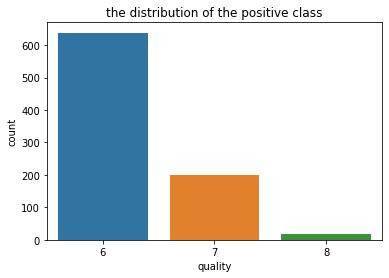

In [154]:
# draw distribution of the positive class
pos_dp = sns.countplot(red_wine.quality[red_wine.rating ==1])
pos_dp.set(title='the distribution of the positive class')

[Text(0.5, 1.0, 'the distribution of the negative class')]

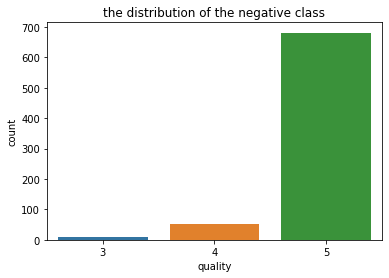

In [155]:
# draw distribution of the negative class
neg_dp = sns.countplot(red_wine.quality[red_wine.rating ==0])
neg_dp.set(title='the distribution of the negative class')

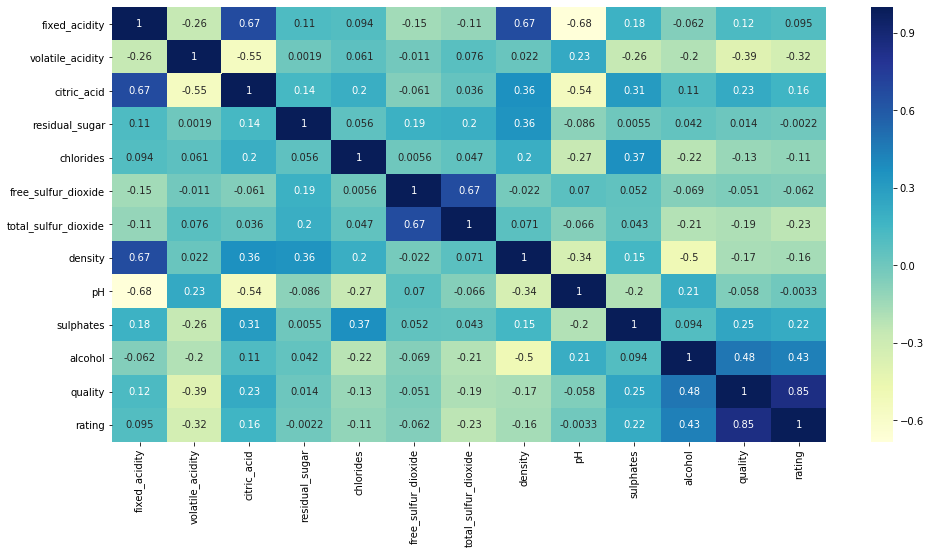

In [156]:
# correlation map 
plt.figure(figsize=(16, 8))
sns.heatmap(red_wine.corr(), annot=True,  cmap="YlGnBu")
# we pick some features that have relatively high correlation with 'rating'

[Text(0.5, 0, 'volatile acidity'),
 Text(0.5, 1.0, 'the distribution of volatile acidity')]

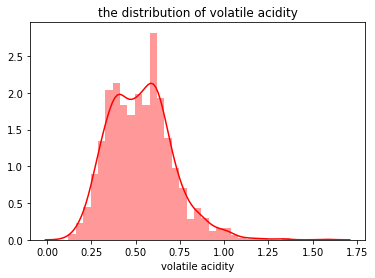

In [157]:
# the distribution of volatile acidity
va_dp = sns.distplot(red_wine.volatile_acidity, hist=True, kde=True, color='red')
va_dp.set(xlabel='volatile acidity', title='the distribution of volatile acidity')

[Text(0.5, 0, 'total sulfur dioxide'),
 Text(0.5, 1.0, 'the distribution of total sulfur dioxide')]

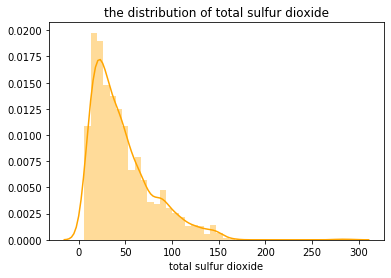

In [158]:
# the distribution of total sulfur dioxide
tsd_dp = sns.distplot(red_wine.total_sulfur_dioxide, hist=True,kde=True, color = 'orange')
tsd_dp.set(xlabel='total sulfur dioxide', title='the distribution of total sulfur dioxide')

[Text(0.5, 0, 'sulphates'), Text(0.5, 1.0, 'the distribution of sulphates')]

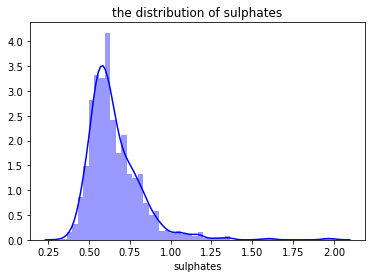

In [159]:
# the distribution of sulphates
s_dp = sns.distplot(red_wine.sulphates, hist=True,kde=True, color = 'blue')
s_dp.set(xlabel='sulphates', title='the distribution of sulphates')

[Text(0.5, 0, 'alcohol'), Text(0.5, 1.0, 'the distribution of alcohol')]

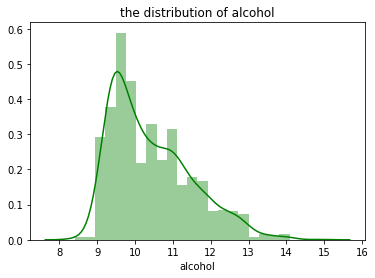

In [160]:
# the distribution of alcohol
a_dp = sns.distplot(red_wine.alcohol, hist=True,kde=True, color = 'green')
a_dp.set(xlabel='alcohol', title='the distribution of alcohol')